# Homework 5: 

**DUE:** 5pm EST, March 17, 2020

<br>

### **Conceptual:** Short answer questions. Be concise

---

1. Suppose that we have a dataset with five predictors, $X_1 = GPA$, $X_2 = IQ$, $X_3 = Gender$ (1 for Female and 0 for Male), $X_4$ = Interaction between GPA and IQ, and $X_5$ = Interaction between GPA and Gender. The response variable ($Y$) is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta_0}$ =50, $\hat{\beta_1}$ =20, $\hat{\beta_2}$ =0.07, $\hat{\beta_3}$ =35, $\hat{\beta_4}$ =0.01, $\hat{\beta_5}$ =-10.

<br>
    
_(a) Which answer is correct, and why?_

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

**Answer:**

The correct answer is iii. 

The interaction term for $X_5$ shows that as GPA goes up, women increasingly earn less relative to men. For those with a low GPA, women earn more, but for those with a higher GPA, men earn more.


<br>

_(b) Predict the salary of a female graduate with IQ of 110 and a GPA of 4.0._

**Answer:**

$\hat{y}$ = $\hat{\beta_0}$ + $\hat{\beta_1}4.0$ + $\hat{\beta_2}110$ + $\hat{\beta_3}1$ + $\hat{\beta_4}(110*4.0)$ + $\hat{\beta_5}(1*4.0)$


$\hat{y}$ = 50 + (20x * 4) + (0.07 * 110) + (35 * 1) + (0.01 * 110x4) + (-10 * 4)



In [38]:
50 + (20*4.0) + (0.07*110) + (35*1) + (0.01*110*4) + (-10*4.0)

#The salary will be $137,100


[1] 137.1

<br>

_(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer._

**Answer:**
False. Although the interaction term is small, evidence of an effect is irrespective of the size of the effect, but rather relies on the confidence with which this effect is likely observed in the population.


---

2. What are high leverage observations? How do they impact your model fits? What assumption of linear regression do they violate?

**Answer:**

High leverage points are data points that are outliers on X, or deviate significantly from the mean of X relative to other data points. High leverage points can bias f(x) by giving biased coefficient estimates (i.e., pulling the regression line) and have a large impact on the regression line relative to other anomolies in the data (e.g., outliers on Y).

The regression will show that the model fits the data, even though the line may be drastically different with one or a few high leverage points removed.

High leverage points violate the assumption that f(x) is stationary. High leverage points are observations sampled from a different underlying distribution than the rest of the data. 




---

3. A linear mixed effect model has the form $Y = X\beta + Z\upsilon + \epsilon$. 

<br>

_(a) What are the assumptions about $Z$ and $\upsilon$ that make this different from using a regular control variable in a simple linear regression model?_

**Answer:** 

In mixed effects models we assume that $Z$ is a matrix of the levels of the random variable with some random variance structure and $\upsilon$, the effect of the batch on the outcome, is random, meaning for each unit change in $Z$ we do not expect a direct unit change up or down in Y. The variance structure of $\upsilon$ is different than the variance structure of the fixed effects. In a simple linear regression we assume that the values of the predictor variable are meaningful with respect to changes in Y, whereas in a mixed model the value of $Z$ is assumed to be meaningless in terms of changes in Y, since each level of $Z$ has its own Y variance.


<br>

_(b) What is the objective function for this model (i.e., the function that needs to be minimized to find the optimal parameters) and how is it different than the objective function for the ordinary least squares model?_

**Answer:**

The objective function for models with random effects terms is:

$$min(||Y-X\beta-Z\Lambda_{\theta}\upsilon||^2+||\upsilon||^2)$$

Each level of the random factor is assumed to have its own random error and unique variance in Y. To minimize this objective function with mixed effects models, we have to estimate the covariance matrix ($\Lambda_{\theta}$) that explains the random variance of $Z$. Unlike with OLS regression, where a confound variable is included to reduce the MSE, in mixed effects models the levels of the random variable do not correspond numerically with unit changes in Y but are rather randomly determined. 

<br>

_(c) What advantage does including a random effects term in your model give you with regards to understanding the fixed effects relationship?_

**Answer:**

Including a random effects term isolates the random effect of the batch on the outcome variable, as well as the effect of the batch on how the fixed effect variable influences Y. Including a random effect term may not only increase precision of the estimate of the fixed effect term, but by isolating the variance of Y in each level of the random variable, could actually reveal a reverse association between X and Y, as in the case of Simpson's Paradox.  Thus including the random effect helps illuminate the true effect of X on Y in the data, removing the random batch effect.


<br>

_(d) Which of these variables would be considered random factors?_

* Age
* Subject ID
* Classroom number
* Gender
* Reaction Time
* JPEG image filename
* Time of day

**Answer:**

Subject ID,
Classroom number,
JPEG image filename


---

### **Applied:** Show your code & plots

We will use both datasets from the CRAN universe and the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells.

---

4. Load the cbpp dataset from the lme4 library. Run ?cbpp after loading the lme4 library to get information on the dataset.

(a) Plot the relationship between herd size and CBPP incidence


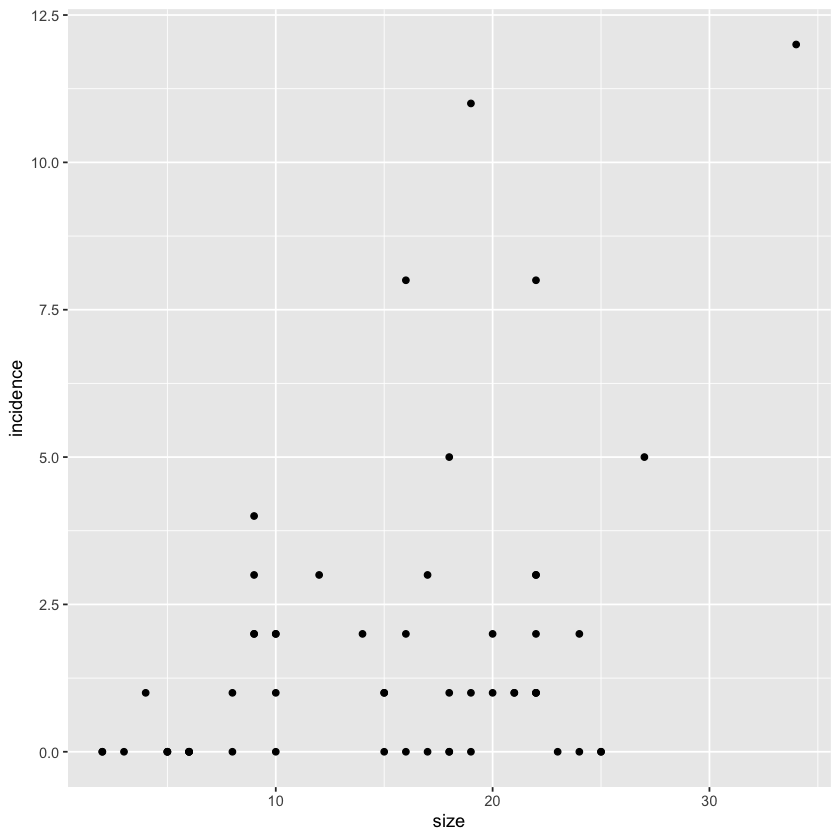

In [19]:
# -------------------------------
# Question 4
# -------------------------------
library(Matrix)
#install.packages("lme4")
library(lme4)

?cbpp

library(ggplot2)
ggplot(cbpp, aes(size, incidence)) +
  geom_point()




(b) Use the lm function to model the effect of herd size (predictor) on CBPP incidence (response). How does herd size impact disease rate? Report the results of the model.


In [20]:
# (b)

model1 <- lm(incidence ~ size, data=cbpp)
summary(model1)

#Herd size has a positive effect on CBPP incidence: the larger the size of the herd, the more CBPP cases



Call:
lm(formula = incidence ~ size, data = cbpp)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1456 -1.5925 -0.4864  0.8006  8.6840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.31106    0.73554  -0.423  0.67405   
size         0.13827    0.04389   3.150  0.00266 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.432 on 54 degrees of freedom
Multiple R-squared:  0.1553,	Adjusted R-squared:  0.1396 
F-statistic: 9.926 on 1 and 54 DF,  p-value: 0.002657



(c) Use the lmer function to include the herd identifier as a random effect. How does this impact the fixed effect of herd size on CBPP incidence?


In [21]:
# (c)
model2 <- lmer(incidence ~size + (size|herd), data=cbpp)
summary(model2)

#This increases the fixed effect of herd size on CBPP incidence

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: incidence ~ size + (size | herd)
   Data: cbpp

REML criterion at convergence: 240.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7937 -0.5979 -0.1649  0.4926  2.5174 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 herd     (Intercept) 0.5398   0.7347        
          size        0.0331   0.1819   -1.00
 Residual             2.4319   1.5595        
Number of obs: 56, groups:  herd, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.54192    0.63637  -0.852
size         0.19645    0.06483   3.030

Correlation of Fixed Effects:
     (Intr)
size -0.822
convergence code: 0
boundary (singular) fit: see ?isSingular



(d) Compare the simple linear model (i.e., the fixed effects only model) with the mixed effect model using AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion). Does adding the random effect to the model improve or change the fixed effect?


In [22]:
# (d)
AIC(model1)
AIC(model2)

#Adding the random effect in model2 improves (reduces) AIC. This means making the model more complicated by adding 
#the random effect term provides a better model, 
#even accounting for the increased dimensionality of the more complex model.

[1] 262.4036

[1] 252.2996

---

5. Load the HCP dataset.

_(a) Make a new data frame that includes the fields for subject ID (Subject), gender (Gender), age (Age), intracranial volume (FS_IntraCranial_Vol), and total gray matter volume (FS_Total_GM_Vol). Load the variables in that order. Remove the _na_'s and z-score the values for intracranial volume and total gray matter volume._

In [31]:
# -------------------------------
# Question 5
# -------------------------------
unrestricted_trimmed_1_7_2020_10_50_44 <- read.csv("~/GitHub_Repo/DataScience2020/Maheux_DSPN_S20/Data/unrestricted_trimmed_1_7_2020_10_50_44.csv", header=TRUE)
dat <- unrestricted_trimmed_1_7_2020_10_50_44 

library(tidyverse)

dat %>% select(Subject, Gender, Age, FS_IntraCranial_Vol, FS_Total_GM_Vol) %>% na.omit() -> dat

dat <- mutate(dat, ICvolz = (FS_IntraCranial_Vol-mean(FS_IntraCranial_Vol))/sd(FS_IntraCranial_Vol)) 
dat <- mutate(dat, GMvolz = (FS_Total_GM_Vol-mean(FS_Total_GM_Vol))/sd(FS_Total_GM_Vol)) 
 


<br>

(b) Take this new dataframe and fit a simple logistic regression model to classify gender based on the intracranial volume measure and examine the model fit using the summary function_


In [29]:
# (b)

#logistic regression model
logmodel <- glm(Gender~ICvolz, data=dat, family=binomial)
summary(logmodel)



Call:
glm(formula = Gender ~ ICvolz, family = binomial, data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5646  -0.6769  -0.1836   0.6434   3.5450  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.36336    0.08133  -4.467 7.91e-06 ***
ICvolz       2.22771    0.13192  16.886  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  968.67  on 1111  degrees of freedom
AIC: 972.67

Number of Fisher Scoring iterations: 5


<br>

(c) Calculate the confusion matrix for evaluating how well the model can classify the dataset and find the classification accuracy for the logistic regression model. Report the classification accuracy.

**Note:** Be careful to take note how R automatically codes Gender and make sure your labels are matched accordingly.


In [33]:
# (c)
contrasts(dat$Gender)

glm_prob_df =data.frame(predict(logmodel, type="response"))
colnames(glm_prob_df) = c('predicted_prob')
glm_prob_df$predicted_binary=rep("M",nrow(dat))
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob<.5]="F"

confusion_df = data.frame(glm_prob_df$predicted_binary, dat$Gender)
colnames(confusion_df) = c('predicted', 'actual')
table(confusion_df)
mean(confusion_df$predicted == confusion_df$actual)

##The classification accuracy is 80.86%


,M
F,0
M,1


         actual
predicted   F   M
        F 506 113
        M 100 394

[1] 0.8086253

<br>

(d) Using the _boot_ library, calculate the leave one out cross-validation (LOOCV) for the same model you fit in (b).

In [34]:
# (d)
library(boot)

cv.error = cv.glm(dat, logmodel, K=nrow(dat))
cv.error$delta




[1] 0.1367901 0.1367898

<br>

(e) Now test the k-fold cross validation accuracy using K=10. Is this better, worse, or the same than the LOCCV accuracy?

In [35]:
# (e)
cv.errorK = cv.glm(dat, logmodel, K=10)
cv.errorK$delta

##The 10-fold CV is very similar to the LOOCV but is slightly better


[1] 0.1367370 0.1367121

(f) Finally, fit a LDA model with the same variables and plot the model fit. Make sure you load the MASS library to use the lda function. What's the classification accuracy of the LDA model?

Call:
lda(Gender ~ ICvolz, data = dat)

Prior probabilities of groups:
        F         M 
0.5444744 0.4555256 

Group means:
      ICvolz
F -0.5673165
M  0.6780943

Coefficients of linear discriminants:
            LD1
ICvolz 1.274621

         actual
predicted   F   M
        F 501 111
        M 105 396

[1] 0.8059299

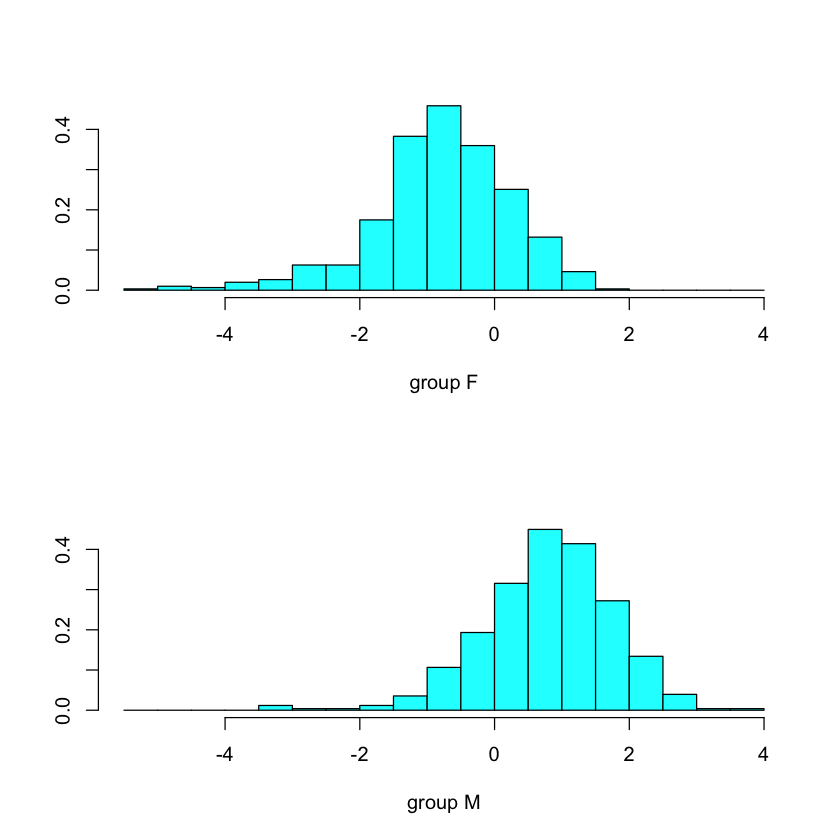

In [37]:
# (f)


library(MASS)

lda.fit <- lda(Gender~ICvolz, data=dat)

lda.fit
plot(lda.fit)

glm_prob_df_lda =data.frame(predict(lda.fit, type="response"))
confusion_df_lda = data.frame(glm_prob_df_lda$class, dat$Gender)
colnames(confusion_df_lda) = c('predicted', 'actual')
table(confusion_df_lda)
mean(confusion_df_lda$predicted == confusion_df$actual)

#The classification accuracy is 80.59%

